<a href="https://colab.research.google.com/github/vamsikandula03/pytorch-learning/blob/main/Linearity_vs_non_linearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


A classification problem will be just perfect to showcase the linearity vs non linearity in model.
We use sklearn make_circles dataset and create 2 circles


In [1]:
from sklearn.datasets import make_circles
n_smaples=1000
X,y=make_circles(n_smaples,noise=0.03,random_state=42)

In [2]:
import pandas as pd
circles=pd.DataFrame({
    "X1":X[:,0],
    "X2":X[:,1],
    "label":y
})

In [4]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

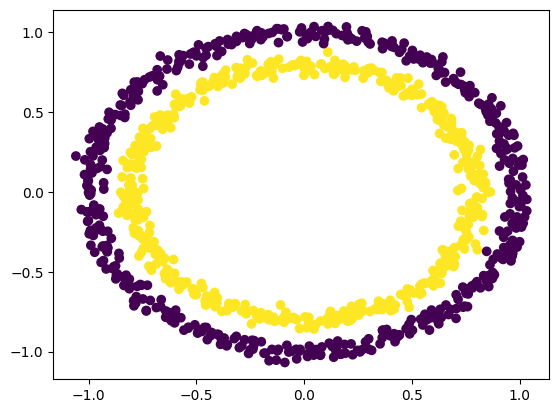

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=circles["X1"],y=circles["X2"],c=circles["label"])

In [8]:
import torch
X=torch.from_numpy(X).type(torch.float)
Y=torch.from_numpy(y).type(torch.float)

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
print(y_train.shape)

torch.Size([800])


In [43]:
from torch import nn

Model 1: we first try to classify using linear layers

In [62]:
class Circlemodel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    layer1outs=self.layer1(x)
    labels=self.layer2(layer1outs)
    return labels


In [54]:
model=Circlemodel1()
model

Circlemodel1(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [55]:
loss_fn=nn.BCEWithLogitsLoss()

In [56]:
optim=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [57]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [58]:
torch.manual_seed(42)
epochs=100

for epoch in range(epochs):
  model.train()
  y_logits=model(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optim.zero_grad()
  loss.backward()
  optim.step()
  model.eval()
  with torch.inference_mode():
    test_logits=model(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  print(f"Epoch:{epoch} | Loss:{loss:.5f},Accuracy:{acc:.2f}% | Test loss:{test_loss:.5f}, Test accuracy:{test_acc:.5f}")

Epoch:0 | Loss:0.69569,Accuracy:50.00% | Test loss:0.69721, Test accuracy:50.00000
Epoch:1 | Loss:0.69543,Accuracy:50.00% | Test loss:0.69704, Test accuracy:50.00000
Epoch:2 | Loss:0.69521,Accuracy:50.00% | Test loss:0.69689, Test accuracy:50.00000
Epoch:3 | Loss:0.69500,Accuracy:50.00% | Test loss:0.69675, Test accuracy:50.00000
Epoch:4 | Loss:0.69481,Accuracy:50.00% | Test loss:0.69663, Test accuracy:50.00000
Epoch:5 | Loss:0.69465,Accuracy:50.00% | Test loss:0.69653, Test accuracy:50.00000
Epoch:6 | Loss:0.69450,Accuracy:50.00% | Test loss:0.69643, Test accuracy:50.00000
Epoch:7 | Loss:0.69436,Accuracy:50.00% | Test loss:0.69635, Test accuracy:50.00000
Epoch:8 | Loss:0.69424,Accuracy:50.00% | Test loss:0.69628, Test accuracy:50.00000
Epoch:9 | Loss:0.69413,Accuracy:50.00% | Test loss:0.69621, Test accuracy:50.00000
Epoch:10 | Loss:0.69403,Accuracy:50.00% | Test loss:0.69615, Test accuracy:50.00000
Epoch:11 | Loss:0.69394,Accuracy:49.75% | Test loss:0.69610, Test accuracy:47.00000
Ep

In [79]:
#it helps us to visualize the decision boundary of our model
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


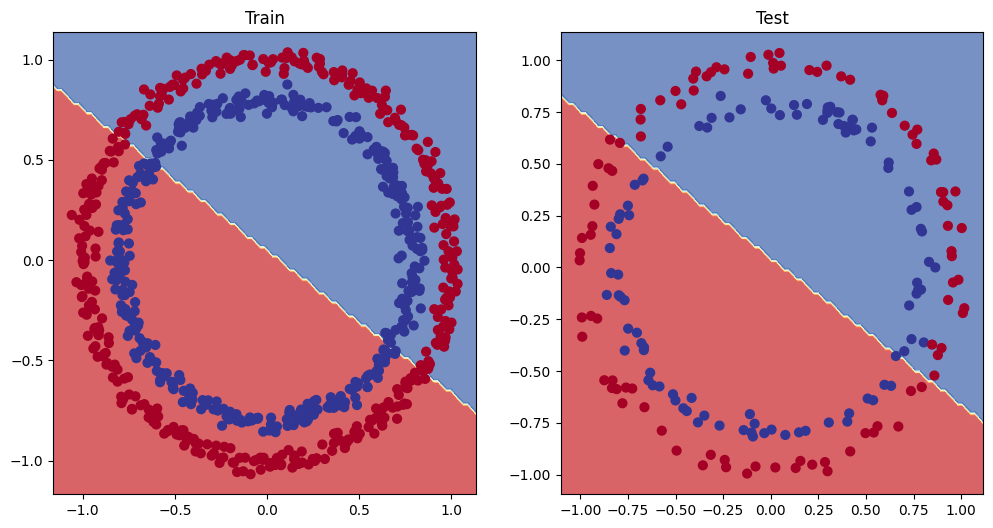

In [59]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

Model 2: lets try adding more layers to it

In [61]:
class Circlemodel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    z=self.layer1(x)
    z=self.layer2(z)
    z=self.layer3(z)
    return z

In [63]:
model1=Circlemodel2()
model1

Circlemodel2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [65]:
loss_fn=nn.BCEWithLogitsLoss()
optim=torch.optim.SGD(model1.parameters(),lr=0.1)

In [68]:
torch.manual_seed(42)
epoches=1000
for epoch in range(epoches):
  y_logits=model1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optim.zero_grad()
  loss.backward()
  optim.step()
  model1.eval()
  with torch.inference_mode():
    test_logits=model1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss:{loss:.5f},Accuracy:{acc:.2f}% | Test loss:{test_loss:.5f}, Test accuracy:{test_acc:.5f}")

Epoch:0 | Loss:0.69396,Accuracy:50.88% | Test loss:0.69261, Test accuracy:51.00000
Epoch:10 | Loss:0.69369,Accuracy:50.25% | Test loss:0.69270, Test accuracy:50.00000
Epoch:20 | Loss:0.69351,Accuracy:50.12% | Test loss:0.69283, Test accuracy:49.50000
Epoch:30 | Loss:0.69339,Accuracy:50.50% | Test loss:0.69297, Test accuracy:48.00000
Epoch:40 | Loss:0.69329,Accuracy:50.38% | Test loss:0.69310, Test accuracy:49.00000
Epoch:50 | Loss:0.69322,Accuracy:49.88% | Test loss:0.69324, Test accuracy:50.00000
Epoch:60 | Loss:0.69317,Accuracy:49.38% | Test loss:0.69336, Test accuracy:51.50000
Epoch:70 | Loss:0.69312,Accuracy:49.38% | Test loss:0.69348, Test accuracy:50.50000
Epoch:80 | Loss:0.69309,Accuracy:50.12% | Test loss:0.69359, Test accuracy:50.00000
Epoch:90 | Loss:0.69307,Accuracy:50.50% | Test loss:0.69370, Test accuracy:48.50000
Epoch:100 | Loss:0.69305,Accuracy:50.38% | Test loss:0.69379, Test accuracy:48.00000
Epoch:110 | Loss:0.69303,Accuracy:50.88% | Test loss:0.69388, Test accuracy:

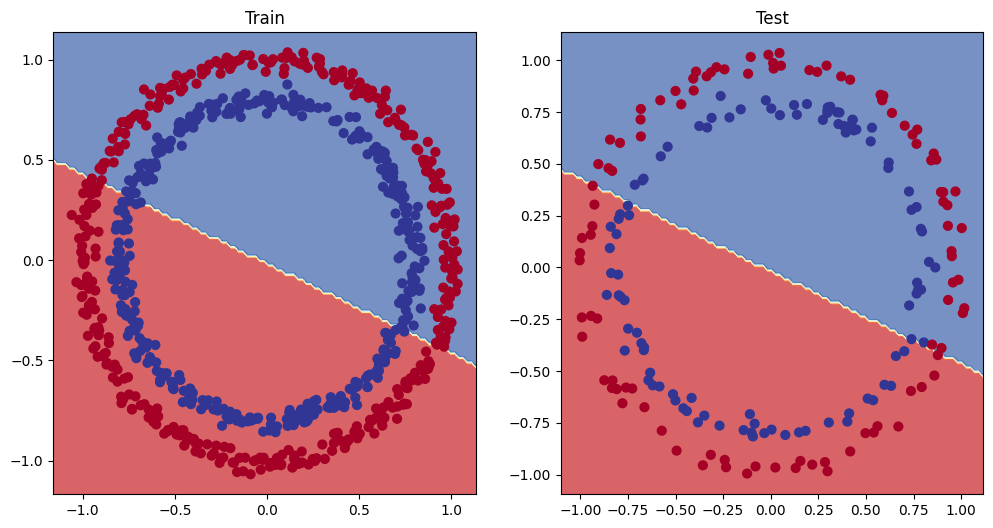

In [69]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

Model 3


In [83]:

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [84]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [85]:
epochs=1000
for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69603, Accuracy: 50.00% | Test Loss: 0.69548, Test Accuracy: 50.00%
Epoch: 1 | Loss: 0.69577, Accuracy: 50.00% | Test Loss: 0.69523, Test Accuracy: 50.00%
Epoch: 2 | Loss: 0.69552, Accuracy: 50.00% | Test Loss: 0.69499, Test Accuracy: 50.00%
Epoch: 3 | Loss: 0.69529, Accuracy: 50.00% | Test Loss: 0.69477, Test Accuracy: 50.00%
Epoch: 4 | Loss: 0.69506, Accuracy: 50.00% | Test Loss: 0.69455, Test Accuracy: 50.00%
Epoch: 5 | Loss: 0.69485, Accuracy: 50.00% | Test Loss: 0.69435, Test Accuracy: 50.00%
Epoch: 6 | Loss: 0.69465, Accuracy: 50.00% | Test Loss: 0.69416, Test Accuracy: 50.00%
Epoch: 7 | Loss: 0.69446, Accuracy: 50.00% | Test Loss: 0.69399, Test Accuracy: 50.00%
Epoch: 8 | Loss: 0.69428, Accuracy: 50.00% | Test Loss: 0.69382, Test Accuracy: 50.00%
Epoch: 9 | Loss: 0.69410, Accuracy: 50.00% | Test Loss: 0.69365, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.69393, Accuracy: 50.00% | Test Loss: 0.69350, Test Accuracy: 50.00%
Epoch: 11 | Loss: 0.69377, Accuracy: 50.00

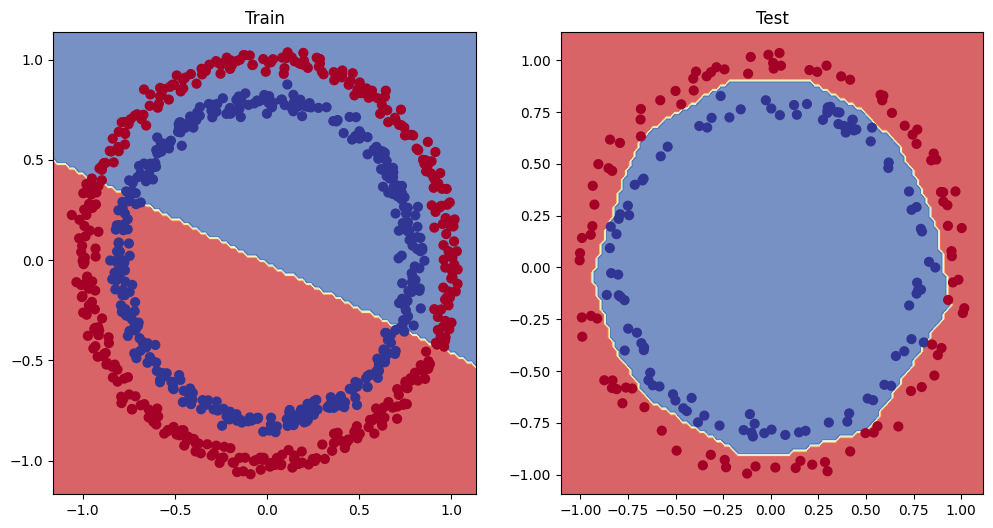

In [86]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

the values which gave this accuracy if we try to run again it may does not give good accuracy because starting weights change and which might change the accuracy

In [91]:
print(model_3.state_dict())

OrderedDict([('layer_1.weight', tensor([[ 0.0140,  0.8008],
        [ 0.1499, -0.1924],
        [ 1.1811, -0.3254],
        [-1.2967, -0.4448],
        [ 0.1698,  0.2476],
        [-1.2634,  0.6980],
        [-0.1234, -1.8119],
        [-0.7451,  1.1308],
        [ 1.5746,  0.6713],
        [ 0.3730,  1.0811]])), ('layer_1.bias', tensor([-0.3335, -0.3891, -0.3237, -0.6029, -0.4772, -0.3708, -0.2080, -0.1675,
        -0.2891, -0.5272])), ('layer_2.weight', tensor([[ 1.5409e-01, -1.8640e-01,  6.4271e-02,  3.7082e-01, -5.3121e-02,
          4.8233e-01,  5.5285e-01,  2.8006e-01,  3.8053e-01,  2.4702e-01],
        [ 4.9622e-03, -2.3000e-02, -1.0718e-02,  1.1685e-01,  2.9402e-01,
         -8.3120e-02, -1.3621e-01, -7.8463e-02, -1.5210e-01,  5.3784e-02],
        [ 3.4316e-01,  2.4728e-01,  4.1561e-01, -1.3785e-01, -1.6972e-01,
          7.5186e-02,  1.8373e-01,  1.7789e-01,  3.8028e-04,  2.8683e-01],
        [-2.3999e-01, -2.0009e-01, -2.6291e-01,  2.9985e-01, -2.9945e-01,
          2.5727e-0